### EDA

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [2]:
from tqdm import tqdm
text = "I work for life. Life works for me. I care a lot for life"
lines = text.split(".")
print(lines)
data = []

for i in range(len(lines)):
    data.append({"id": i, "text": lines[i]})

data

['I work for life', ' Life works for me', ' I care a lot for life']


[{'id': 0, 'text': 'I work for life'},
 {'id': 1, 'text': ' Life works for me'},
 {'id': 2, 'text': ' I care a lot for life'}]

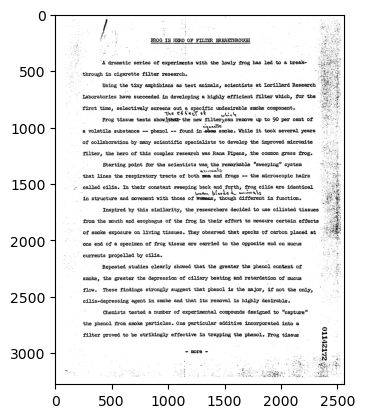

In [12]:
file_path = 'dataset\\Scientific\\01142172_01142173.jpg'
img = cv2.imread(file_path)
plt.imshow(img)
plt.show()

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 11, 2)
kernel = np.ones((1, 1), np.uint8)
processed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
processed = cv2.medianBlur(processed, 3)  
coords = np.column_stack(np.where(processed > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle
(h, w) = processed.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
deskewed = cv2.warpAffine(processed, M, (w, h), flags=cv2.INTER_CUBIC, 
                          borderMode=cv2.BORDER_REPLICATE)
custom_config = r'--oem 3 --psm 6'  # OCR Engine Mode 3, Page Segmentation Mode 6
text = pytesseract.image_to_string(deskewed, config=custom_config)
print(text)

aa Bg oo an
KR n ;
re: pe OG 8 7 oo
inant ee | ,
itn CEE !
rebedilg ge F UR
sATHTTEHH 3
TTL
THREE »
sihaag ges perdi
¢ cite Ef 2 gg PEbpe
Pia eiel ¢ b Bate
pGeba 27.308 pei geieal
ee Es a & ee gs ECOL
d pa be pee § SELL EEE:
cb aa 8 . &§ # trELEE LG tb
PE eds Peers Eg @
beglidg REAL
BE & eg 8 PEE Ate
et et af & bo ” 9 a OB nv fe) ag e 6
aan: BE ¢ ieee iipas si ase § o
gP hes FE g pueghe eae dy
cibeeey Pah & ep Uae!
fg & @ H Ef PEGE ELE PS gag eS Ho
Boe 2 a 8 bard the a
pa & aauee PEEP gy r
aauees pete ds ete gE c
g & gc £ E HEE TEE
sansa OB ete : ff
iy E . t= 8 ° ~~ Tv B et Ry (] o B @ ° wee © n ce)
eee bia | He
pighegl He i
; BE 4 Hint
: Tt
; Bo” TERE :
TO DEE EERE ¢ ® 0 f EB
. . ST B
oe ee oe & ofa gt Py 7
Lo SESS e 8 & bere
— oo oe Moa Bf yg Bg * Ba 8
Do tee SEAS a a ¢ got » °
* eee cS. ee g é &



In [10]:
class ImagePreprocessor:
    def __init__(self, image_path: str):
        """Initialize the preprocessor with an image file path."""
        self.image_path = image_path
        self.image = cv2.imread(image_path)
    
    def to_grayscale(self):
        """Convert image to grayscale."""
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        return self.image
    
    def remove_noise(self):
        """Apply Gaussian blur to reduce noise."""
        self.image = cv2.GaussianBlur(self.image, (3, 3), 0)
        return self.image
    
    def thresholding(self):
        """Apply thresholding for better OCR results."""
        _, self.image = cv2.threshold(self.image, 125, 255,cv2.THRESH_BINARY)
        return self.image
    
    def extract_text(self):
        """Extract text from the processed image using Tesseract OCR."""
        return pytesseract.image_to_string(self.image)
    
    def preprocess_and_extract(self):
        """Run all preprocessing steps and extract text."""
        self.to_grayscale()
        #self.remove_noise()
        self.thresholding()
        
        return self.extract_text()

In [11]:
process = ImagePreprocessor(file_path)
print(process.preprocess_and_extract())

“through in cigarette filter research.

. ‘that lines the respiratory tracts of both mas and frogs -- the microscopic hairs

af _. FROG IS HERO OF FILTER BREAKTHROUGH

“A dramatic series of experiments with the lowly frog has led to a break-

Using the tiny amphibians as test animals, scientists at Lorillard Research
. Laboratories have sueceeded in developing a highly efficient filter which, for the

first time, ‘selectively screens out a specific undesirable smoke component.
~ the C& Cech of whic
Frog tissue tests show |\sitt- the new filter)can remove os to 90 per cent of

a@ volatile substance -- phenol -=- found in’ ae Smoke. While it took several years 7 :

of collaboration by many scientific specialists to develop the improved micronite

filter, the hero of this complex research was Rana Pipens, the common grass frog.
Starting point for the scientists was the remarkable “sweeping” system

an “waals

Z called cilia. In their constant sweeping back and forth, frog cilia are identi

In [5]:
text = pytesseract.image_to_string(img, config='digit')
print(text)

Ellis, Cathy L. (WSA)

From: Hsu, Frank

Sent: Wednesday, March 24, 1999 10:58 AM
To: Ellis, Cathy L. (WSA)

Subject: RE: PLease review asap

Cathy, oO a) 3 D) ler 7

My comments are in blue. It looks good!
Frank

AMNCIGTCORESTA-h
su.dae



In [64]:
h,w,c = img.shape
h, w

(1575, 1200)

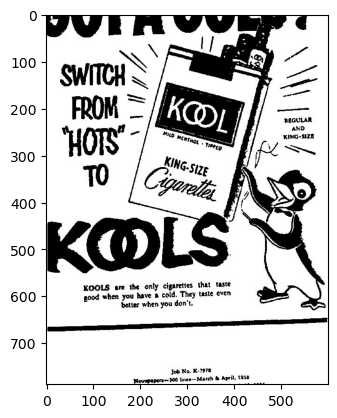

In [66]:
crop = img[int(h/4):int((3*h)/4), int(w/4):int((3*w)/4)]

plt.imshow(crop, cmap='gray')
plt.show()

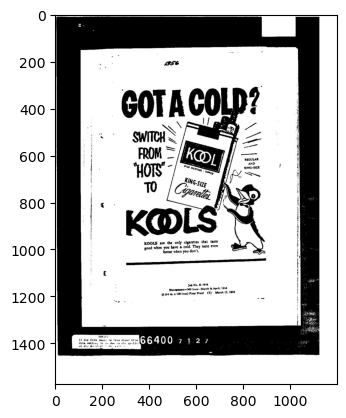

In [73]:
cnts = cv2.findContours(blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    roi = img[y:y+h, x:x+w]
    break

plt.imshow(roi, cmap='gray')
plt.show()

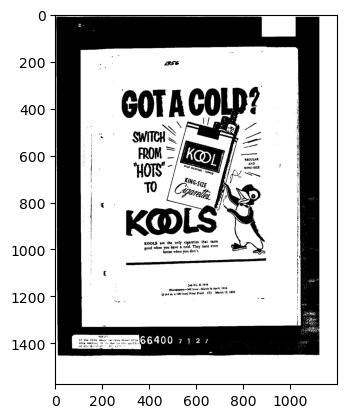

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

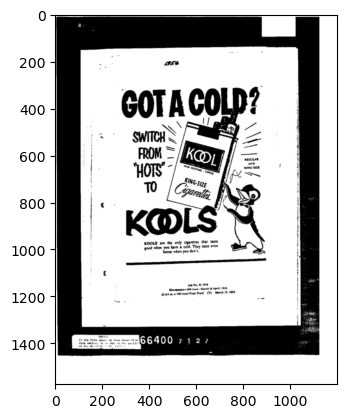

In [22]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blur, cmap='gray')
plt.show()

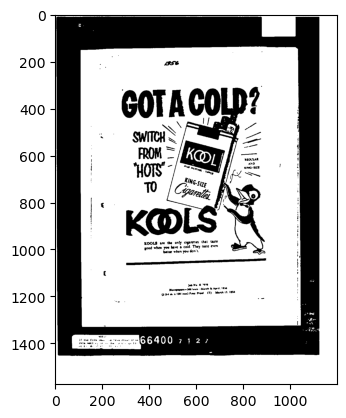

In [25]:
_, binary = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary, cmap='gray')
plt.show()

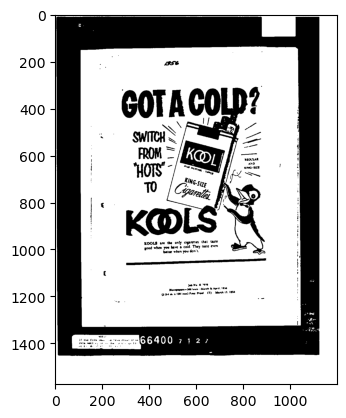

In [29]:
import numpy as np
kernel = np.ones((1, 1), np.uint8)
morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

plt.imshow(morph, cmap='gray')
plt.show()

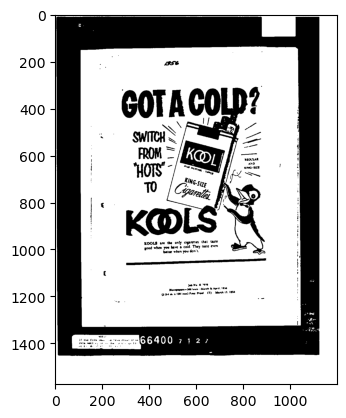

In [49]:
kernel = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])
sharpened = cv2.filter2D(morph, -1, kernel)

plt.imshow(sharpened, cmap='gray')
plt.show()

In [69]:
text = pytesseract.image_to_string(crop, lang='eng')
print(text)

''

In [58]:
import pandas as pd 
import spacy 
import requests 
from bs4 import BeautifulSoup
nlp = spacy.load("en_core_web_sm")

In [59]:
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

K-2978 116 122 PRODUCT
Mareh & April, 1956 144 163 ORG
8 9-4 165 170 DATE
108 177 180 CARDINAL
Proof 193 198 PERSON
7 200 201 CARDINAL
March 15, 1956 203 217 DATE
